In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np

In [23]:
fracs = [0.05, 0.1, 0.25, 0.5, 1.]
names = ['l1eq0.csv', 'l1geq0.csv']
path = '../results/random/'

In [24]:
mnames = {'finetuned_ridgeslowverybig_without_augmentations': 'tuned_0',
          'finetuned_ridgeslowverybig_with_augmentations': 'tuned_1',
          'finetuned_ridgeslowverybig_with_3augmentations':'tuned_3',
          'finetuned_ridgeslowverybig_with_6augmentations':'tuned_6',
          'frozen_ridgeslowverybig_without_augmentations': 'frozen_0',
          'frozen_ridgeslowverybig_with_augmentations': 'frozen_1',
          'frozen_ridgeslowverybig_with_3augmentations':'frozen_3',
          'frozen_ridgeslowverybig_with_6augmentations':'frozen_6',
          'random': 'random',
          'trained': 'trained'}

In [25]:
df1 = pd.read_csv(path+names[0])
df2 = pd.read_csv(path+names[1])

In [26]:
df1

,Name,State,group,seed,train_fraction,test_total_r2
0,finetuned_ridgeslowverybig_with_3augmentations_42,finished,finetuned_ridgeslowverybig_with_3augmentations,42,0.10,0.221491
1,finetuned_ridgeslowverybig_with_3augmentations_42,finished,finetuned_ridgeslowverybig_with_3augmentations,42,0.50,0.541761
2,finetuned_ridgeslowverybig_with_3augmentations_42,finished,finetuned_ridgeslowverybig_with_3augmentations,42,0.05,0.212936
3,finetuned_ridgeslowverybig_with_3augmentations_42,finished,finetuned_ridgeslowverybig_with_3augmentations,42,0.25,0.470848
4,finetuned_ridgeslowverybig_with_3augmentations_43,finished,finetuned_ridgeslowverybig_with_3augmentations,43,0.25,0.412658
...,...,...,...,...,...,...
155,trained_50,finished,trained,50,0.50,0.572823
156,trained_51,finished,trained,51,0.25,0.467304
157,trained_51,finished,trained,51,0.50,0.577128
158,trained_51,finished,trained,51,0.10,0.294777


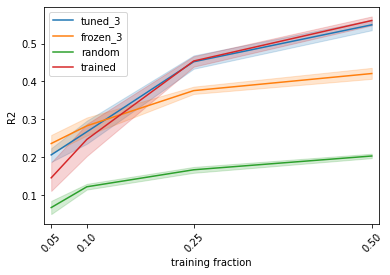

In [27]:
for key, gdf in df1[['group', 'seed', 'test_total_r2', 'train_fraction']].groupby('group'):
    sns.lineplot(data=gdf, x='train_fraction', y='test_total_r2', label=mnames[key])
    plt.xlim(0.04, 0.51)
    plt.xticks([0.05, 0.10, 0.25, 0.5], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    #plt.legend(loc=0, prop={'size': 6})
    plt.savefig('../results/random/l1eq0.pdf', bbox_inches='tight')

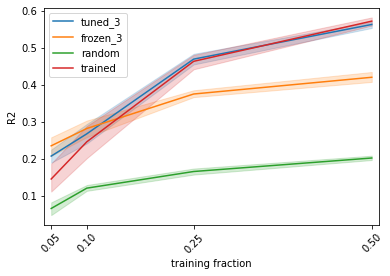

In [28]:
for key, gdf in df2[['group', 'seed', 'test_total_r2', 'train_fraction']].groupby('group'):
    sns.lineplot(data=gdf, x='train_fraction', y='test_total_r2', label=mnames[key])
    plt.xlim(0.04, 0.51)
    plt.xticks([0.05, 0.10, 0.25, 0.5], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    #plt.legend(loc=0, prop={'size': 6})
    plt.savefig('../results/random/l1geq0.pdf', bbox_inches='tight')

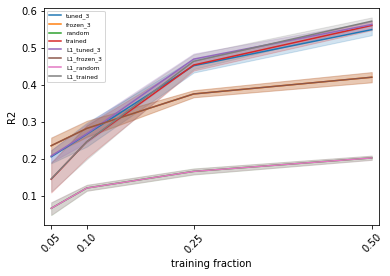

In [30]:
for key, gdf in df1[['group', 'seed', 'test_total_r2', 'train_fraction']].groupby('group'):
    sns.lineplot(data=gdf, x='train_fraction', y='test_total_r2', label=mnames[key])
    plt.xlim(0.04, 0.51)
    plt.xticks([0.05, 0.10, 0.25, 0.5], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')

for key, gdf in df2[['group', 'seed', 'test_total_r2', 'train_fraction']].groupby('group'):
    sns.lineplot(data=gdf, x='train_fraction', y='test_total_r2', label='L1_'+mnames[key])
    plt.xlim(0.04, 0.51)
    plt.xticks([0.05, 0.10, 0.25, 0.5], rotation=45)
    plt.ylabel('R2')
    plt.xlabel('training fraction')
    
plt.legend(loc=0, prop={'size': 6})
plt.savefig('../results/random/both.pdf', bbox_inches='tight')